In [1]:
import tensorflow as tf ## pip install tensorfLow-gpu
import cv2 ## pip install opencv-python
## pip install opencv-contrib-python fullpackage
import os
import matplotlib.pyplot as plt ## pip install matptotlib
import numpy as np ## pip install numpy

In [2]:
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [3]:
img_array.shape # rgb

(48, 48, 3)

In [4]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


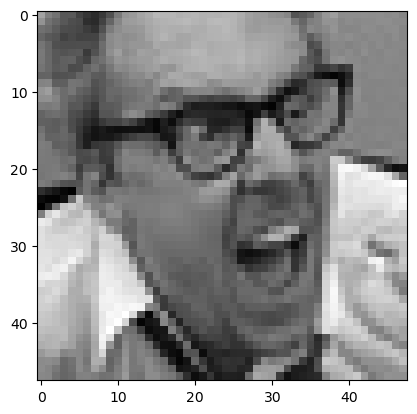

In [7]:
plt.imshow(img_array) 

In [8]:
Datadirectory = "Training/" ## training dataset

In [9]:
Classes = ["0","1","2","3","4","5","6"] ## List of classes = Exact same name as our folders

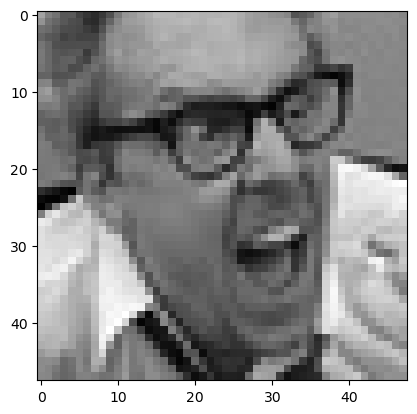

In [11]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        # backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt. show()
        break
    break

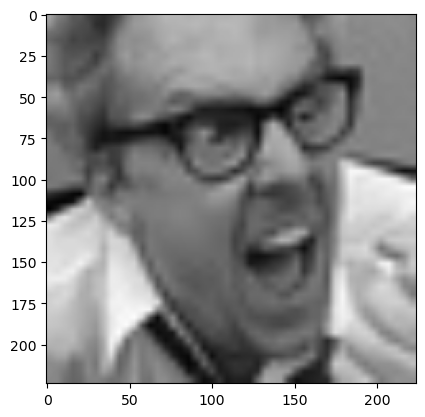

In [12]:
img_size = 224 ## ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt. show()

In [13]:
new_array.shape

(224, 224, 3)

# Reading all images and converting them to array

In [14]:
training_Data = [] ## Data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [15]:
create_training_Data()

In [16]:
print(len(training_Data))

14691


In [17]:
temp = np.array(training_Data)

C:\Users\harsh\AppData\Local\Temp\ipykernel_27460\2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [18]:
temp.shape

(14691, 2)

In [19]:
import random

random.shuffle(training_Data)

In [20]:
X = [] ## data/features
Y = [] ## label

for features,label in training_Data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) ## Converting to 4 dimensions

In [21]:
X.shape

(14691, 224, 224, 3)

In [22]:
# Normalize the data
X = X/255.0; ## We are normalizing

In [23]:
type(Y)

list

In [24]:
Y = np.array(Y)

In [25]:
Y.shape ## 1 D array

(14691,)

In [26]:
Y[1] ## 0000001 00000010 0000100 one hot encoding

0

# Deep Learning model for training - Transfer Learning

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model

In [29]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

# Transfer Learning - Tuning, Weights starts from last check point

In [7]:
base_input = model.layers[0].input ## input

In [8]:
base_output = model.layers[-2].output

In [9]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [10]:
final_output = layers.Dense(128)(base_output) ## Adding new layer, after the output of global pooling layer
final_ouput = layers.Activation('relu')(final_output) ## Activation Function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput) ## Since my classes are 7, classification layer

In [11]:
final_output ## output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [12]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [36]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [13]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
new_model.fit(X,Y, epochs = 25)

NameError: name 'X' is not defined

In [72]:
new_model.save('Final_model_95p07.h5')

C:\Users\harsh\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [16]:
new_model.evaluate ## test data, I not use test, deploy Live image dem

<bound method Model.evaluate of <keras.src.engine.functional.Functional object at 0x00000191DD694DC0>>

In [17]:
frame = cv2.imread("dis.jpg")

In [18]:
frame.shape

(199, 254, 3)

# We need face detection algorithm (gray image)

In [19]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_frontalface_default.xml')

In [20]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [21]:
frame.shape

(199, 254, 3)

In [22]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

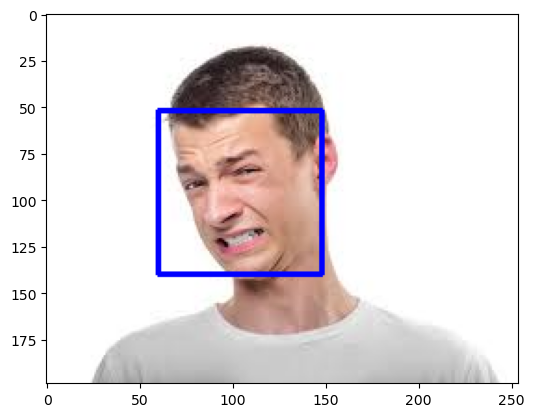

In [23]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

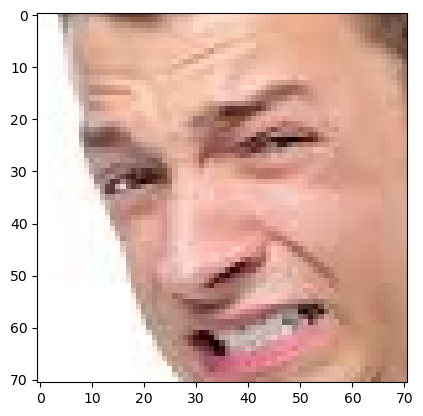

In [24]:
 plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [25]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis =0) ## Need fourth dimension
final_image = final_image/225.0 ## Normalization

In [26]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 750ms/step


In [27]:
Predictions[0]

array([0.01392248, 0.08173408, 0.08788535, 0.23945129, 0.08810583,
       0.44943485, 0.03946617], dtype=float32)

In [28]:
np.argmax(Predictions)

5

# Realtime Video Demo

1/1 [==============================] - 0s 40ms/step


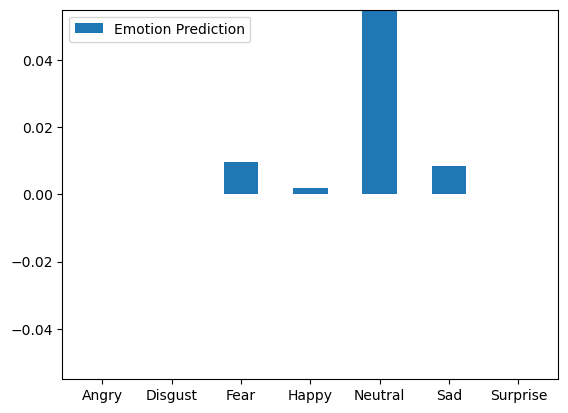

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 47ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 46ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

2
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

2
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 43ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 37ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
Face not detected
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

2
Face not detected
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

2
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
Face not detected
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

5
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

5
Face not detected
Face not detected
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

5
Face not detected
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

5
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

5
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

5
Face not detected
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

5
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

2
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

2
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

2
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

2
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
Face not detected
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 38ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 41ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 56ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 40ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 42ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4
1/1 [==============================] - 0s 39ms/step


<Figure size 640x480 with 0 Axes>

4


<Figure size 640x480 with 0 Axes>

In [29]:
import cv2
path = "./haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Setting the rectangle background to white
rectangle_bgr = (255, 255, 255)
# Making a black image
img = np.zeros((500, 500))
# Setting some text
text = "Some text in the box!"
# Getting the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# Setting the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# Making the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# Create a figure and axis for plotting the emotions
fig, ax = plt.subplots()
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
bar_width = 0.5
index = np.arange(len(emotions))
bar_plot = ax.bar(index, np.zeros(len(emotions)), bar_width, label='Emotion Prediction')
ax.set_xticks(index)
ax.set_xticklabels(emotions)
ax.legend()

cap = cv2.VideoCapture(1)
# Check if the webcam opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Could not open webcam")
    
while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascade + './haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + './haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## Cropping the face
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis =0) ## Need fourth dimension
    final_image = final_image/225.0 ## Normalization
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    
    # Update the bar plot with the new predictions
    for bar, prediction in zip(bar_plot, Predictions[0]):
        bar.set_height(prediction)

    plt.pause(0.1)  # Pause to update the plot
    plt.draw()  # Draw the updated plot
    
    number = np.argmax(Predictions)
    print(number)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (np.argmax(Predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==1):
        status = "Disgust"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==4):
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))
        
    elif (np.argmax(Predictions)==5):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
    elif (np.argmax(Predictions)==6):
        status = "Surprise"
        
        x1,y1,w1,h1 = 0,0,175,75
        #Drawing black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Adding Text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame, status,(100, 150),font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        
    cv2.imshow('Face Emotion Recognition', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
plt.show()  # Show the final plot when the program ends
cap.release()
cv2.destroyAllWindows()